In [1]:
from sklearn.decomposition import PCA
import skimage.transform as transforms
import matplotlib.pyplot as plt
import numpy as np

In [31]:
class FeatureExtractor:
    def __init__(self, in_features=20, out_classes=5):
        self.pca = PCA(n_components = in_features)
        self.out_classes = out_classes
        self.training = True
    
    def extract_features(self, x):
        self.pca.fit((x[:,:,0] + x[:,:,1] + x[:,:,2])/3)
        p = self.pca.singular_values_
        return p

In [35]:
class PredictImage:
    def __init__(self, image, classifier, width=224, height=224):
        self.feature_extractor = FeatureExtractor()
        self.classifier = classifier
        self.height = height;
        self.width = width;
        self.image = image;
        self.new_image = self.transform(image)
        self.features = self.feature_extractor.extract_features(self.new_image)
        
    def transform(self, image):
        height, width, ch = image.shape
        if width < height:
            new_width = self.width
            scale = self.width / width
            new_height = int(height * scale)
        else:
            new_height = self.height
            scale = self.height / height
            new_width = int(width * scale)
        image_tf = transforms.resize(image, (new_height, new_width), 2)
        # center crop
        w_start = 0
        w_stop = self.width
        h_start = 0
        h_stop = self.height
        if new_width > self.width:
            start = (new_width - self.width) // 2
            w_start = start
            w_stop = start + self.width
        if new_height > self.height:
            start = (new_height - self.height) // 2
            h_start = start
            h_stop = start + self.height
        image_tf = image_tf[h_start:h_stop, w_start:w_stop, :]
        return image_tf
    
    def prediction(self):
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.imshow(self.image)
        ax.axis('off')
        plt.tight_layout()
        image_features = np.stack(self.features, axis=0)
        res = self.classifier.predict(self.image.reshape(-1,1))
        return res
    
    def __getitem__(self, feat):
        return self.image, self.features

[0 0 0 ... 0 0 0]


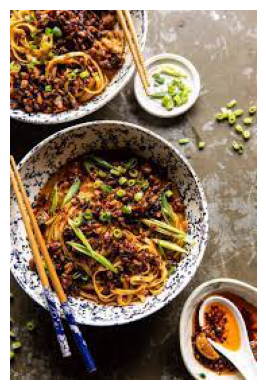

In [37]:
import pickle
import imageio.v2 as imageio

image_filepath = '/Users/cap/Dropbox/Cuisines/images/dan-dan-noodles/dan-dan-1.jpg'
image = imageio.imread(image_filepath)
filename = '/Users/cap/Dropbox/Cuisines/Models/NutriCaptureML_1'
model = pickle.load(open(filename, 'rb'))
result = PredictImage(image, model).prediction()
print(result)